In [1]:
from graphingFunctions import *
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Read in the data as a dataframe
data_white = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-white.csv", 0)
data_red = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-red.csv", 1)

# Format the white data as np arrays
# Only select 1599  out of the 4989 white datasets 
# to match the number of red datapoints
X_white = data_white.values
X_white = np.random.permutation(X_white)
X_white = X_white[0:1599, :]
y_white_quality = X_white[:, -2]
y_white_color = X_white[:, -1]
X_white = X_white[:, :-2]

# Format the red data as np arrays
X_red = data_red.values[:, :-2]
y_red_quality = data_red.values[:, -2]
y_red_color = data_red.values[:, -1]

# Combining data into one set of np arrays
data = pd.concat([data_red, data_white])
X = np.concatenate((X_white, X_red))
y_quality = np.concatenate((y_red_quality, y_white_quality))
y_color = np.concatenate((y_red_color, y_white_color))

# Extract the labels
labels = list(data.columns.values)
labels = [labels[i].title() for i in range(len(labels))]

# Scale everything nicely
X_white_scale = preprocessing.scale(X_white)
X_red_scale = preprocessing.scale(X_red)
X_scale = preprocessing.scale(X)

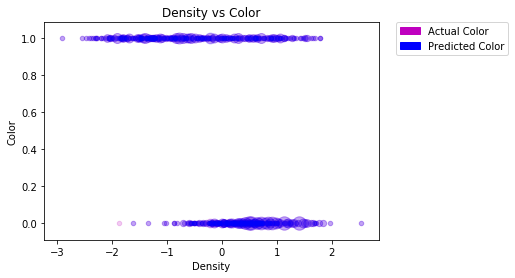

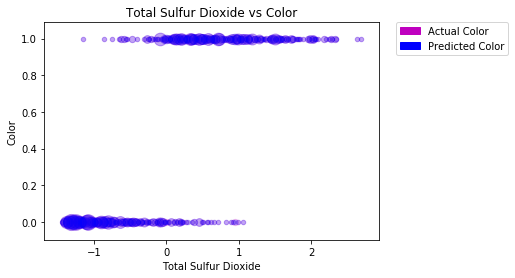

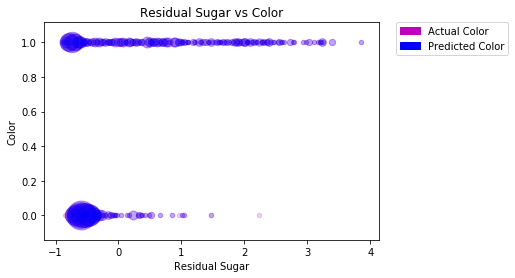

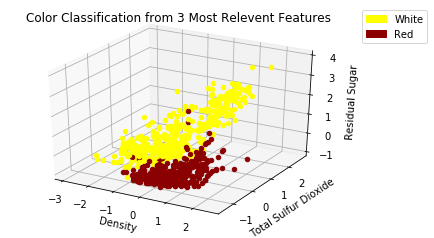

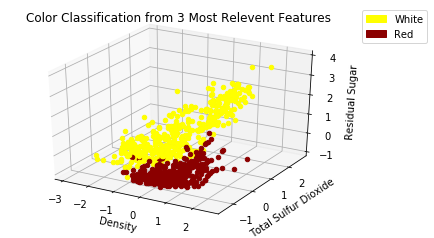

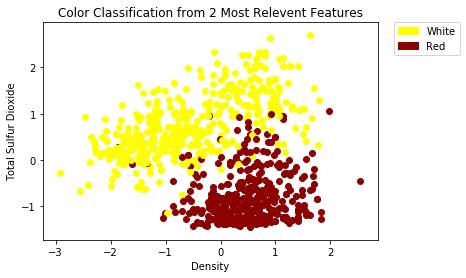

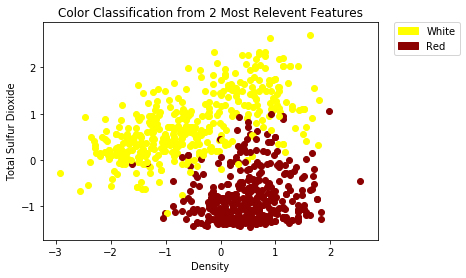

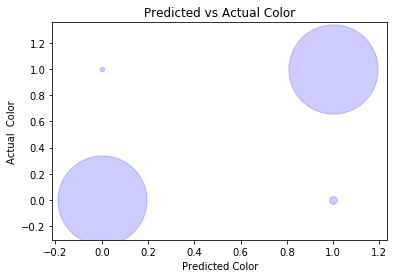

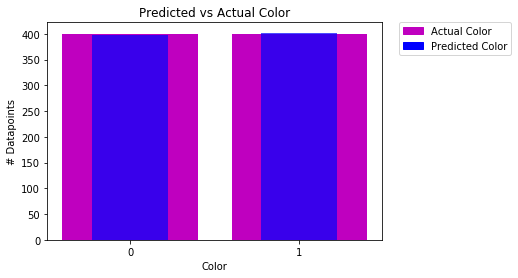


Mean squared error on training data: 0.01
Variance score (1 is perfect prediction): 0.98



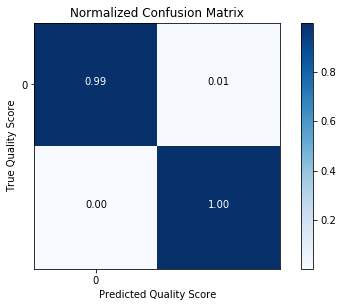

In [3]:
# Split up the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_color)

# Create & train the model
model = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3, store_covariance=True)
model.fit(X_test, y_test)

# Make predictions on the training data
y_predictions = model.predict(X_test)
for i in range(0, len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Color', 'both') 

